In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("StudentsPerformance.csv")

In [16]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [19]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [20]:
score_columns = ['math score', 'reading score', 'writing score']
df['average_score'] = df[score_columns].mean(axis=1)

In [21]:
df['result'] = df['average_score'].apply(
    lambda x: 'Pass' if x >= 50 else 'Fail'
)

In [22]:
pass_fail_count = df['result'].value_counts()
pass_fail_percentage = df['result'].value_counts(normalize=True) * 100

print("Pass / Fail Count:\n", pass_fail_count)
print("\nPass / Fail Percentage:\n", pass_fail_percentage)


Pass / Fail Count:
 result
Pass    897
Fail    103
Name: count, dtype: int64

Pass / Fail Percentage:
 result
Pass    89.7
Fail    10.3
Name: proportion, dtype: float64


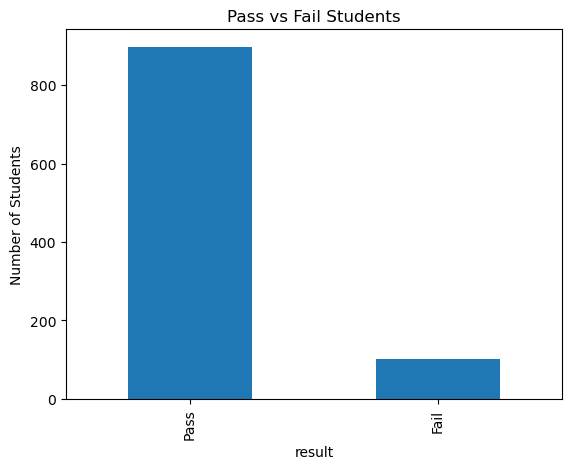

In [23]:
pass_fail_count.plot(kind='bar', title='Pass vs Fail Students')
plt.ylabel('Number of Students')
plt.show()

In [24]:
subject_avg = df[score_columns].mean()
print("Subject-wise Average Scores:\n", subject_avg)

Subject-wise Average Scores:
 math score       66.089
reading score    69.169
writing score    68.054
dtype: float64


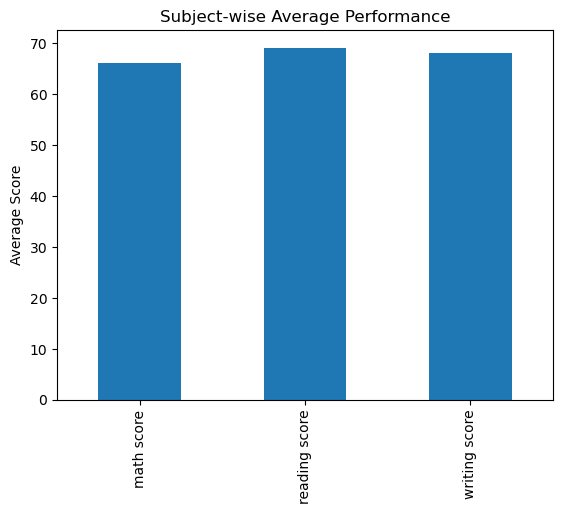

In [25]:
subject_avg.plot(kind='bar', title='Subject-wise Average Performance')
plt.ylabel('Average Score')
plt.show()

In [26]:
df['test_prep_numeric'] = df['test preparation course'].map({
    'none': 0,
    'completed': 1
})

In [28]:
correlation = df['test_prep_numeric'].corr(df['average_score'])
print("Correlation between Test Preparation and Performance:", correlation)

Correlation between Test Preparation and Performance: 0.25670970665622256


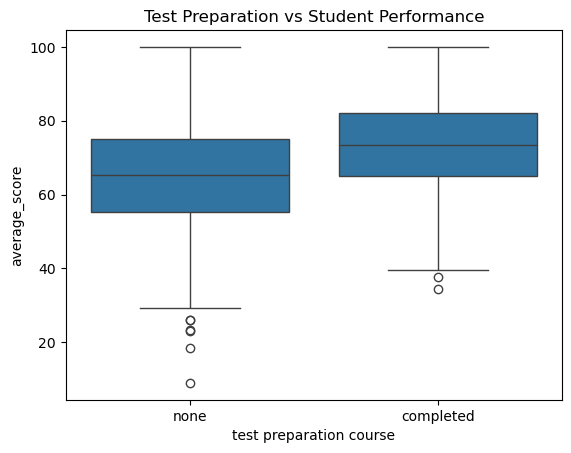

In [31]:
sns.boxplot(x='test preparation course', y='average_score', data=df)
plt.title('Test Preparation vs Student Performance')
plt.show()

In [36]:
df.to_csv("StudentsPerformance.csv", index=False)
print("File saved successfully!")
print(df.head())

File saved successfully!
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   average_score result  test_prep_numeric  
0      72.666667   Pass                  0  
1      82.333333   Pass              